# **Regresión logística**

In [40]:
# Importar librerias
import pandas as pd
from pandas import DataFrame
import numpy as np
from os import listdir
import cv2 as cv

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import plotly.express as px
import time

In [41]:
cwd = os.path.abspath(os.getcwd()) + '\\'
print("CWD =>",cwd)

files = listdir(cwd)
print("Files =>", files)

CWD => d:\Documents\Programming\Others\classifierTest\
Files => ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Classifier.ipynb', 'test']


     0    1    2    3    4    5    6    7    8    9  ...  7491  7492  7493  \
0  255  255  255  255  255  255  255  255  255  255  ...   255   255   255   
1  255  255  255  255  255  255  255  255  255  253  ...   255   255   255   
2  255  255  255  255  255  255  255  255  253  255  ...   255   255   255   
3  255  255  255  255  255  255  255  255  255  254  ...   255   255   255   
4  255  255  255  255  255  255  255  255  255  255  ...   255   255   255   

   7494  7495  7496  7497  7498  7499  etiqueta  
0   255   255   255   255   255   255         0  
1   255   255   255   255   255   255         0  
2   255   255   255   255   255   255         0  
3   255   255   255   255   255   255         0  
4   255   255   255   255   255   255         0  

[5 rows x 7501 columns]


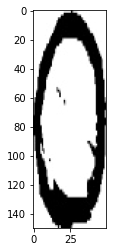

In [42]:
datos = []

columns = [str(index) for index in range(0,(150*50))]
columns += ["etiqueta"]

numberFiles = []

for name in files:
    try:

        numberFiles.append(str(int(name)))

    except ValueError:
        pass

for file in numberFiles: #Vemos todos los folders excepto el ultimo archivo
    path = cwd+file+"\\"
    folderFiles = listdir(path)
    images = []
    for img in folderFiles:
        imgPath = path+img
        datos += [np.append(cv.imread(imgPath,0).flatten(),np.uint(file)).tolist()]

datos = DataFrame(datos,columns=columns)
print(datos.head())

pic1 = np.reshape(datos.values[0][:-1], (150,50))
plt.imshow(pic1, cmap = "gray")

In [43]:
# Revolver el dataset
print(datos.head())
datos = datos.sample(frac=1)
print(datos.head())

     0    1    2    3    4    5    6    7    8    9  ...  7491  7492  7493  \
0  255  255  255  255  255  255  255  255  255  255  ...   255   255   255   
1  255  255  255  255  255  255  255  255  255  253  ...   255   255   255   
2  255  255  255  255  255  255  255  255  253  255  ...   255   255   255   
3  255  255  255  255  255  255  255  255  255  254  ...   255   255   255   
4  255  255  255  255  255  255  255  255  255  255  ...   255   255   255   

   7494  7495  7496  7497  7498  7499  etiqueta  
0   255   255   255   255   255   255         0  
1   255   255   255   255   255   255         0  
2   255   255   255   255   255   255         0  
3   255   255   255   255   255   255         0  
4   255   255   255   255   255   255         0  

[5 rows x 7501 columns]
       0    1    2    3    4    5    6    7    8    9  ...  7491  7492  7493  \
93   255  255  255  255  255  255  255  255  255  253  ...   255   255   255   
316  255  255  255  255  255  255  255  255  2

In [44]:
# Al ser numeros en grayscale, los valores van a estar en el rango de 0 a 255, podemos aplicar un escalamiento

X = DataFrame(datos.values[:,:-1])
y = datos["etiqueta"]

X = X/255

# Convertir a DataFrame
X = DataFrame(X)

X.insert(0, 'Bias', 1) # Agregar columna de bias

print(X.head())
print(y.head())

   Bias         0         1    2    3    4         5         6    7         8  \
0     1  1.000000  1.000000  1.0  1.0  1.0  1.000000  1.000000  1.0  1.000000   
1     1  1.000000  1.000000  1.0  1.0  1.0  1.000000  1.000000  1.0  1.000000   
2     1  1.000000  1.000000  1.0  1.0  1.0  1.000000  1.000000  1.0  1.000000   
3     1  0.996078  0.992157  1.0  1.0  1.0  0.309804  0.007843  0.0  0.003922   
4     1  1.000000  1.000000  1.0  1.0  1.0  1.000000  1.000000  1.0  1.000000   

   ...  7490  7491  7492  7493  7494  7495  7496  7497  7498  7499  
0  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  
1  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  
2  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  
3  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  
4  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  

[5 rows x 7501 columns]
93     0
316    2
399    3
929    7
3      0
Name: etiqueta, dtype: int64


In [45]:
# Declaracion de niveles

A = datos.copy().sample(frac=0.3) # Set A con el 30% de los datos

B = datos.copy().sample(frac=0.6) # Set B con el 60% de los datos

#El ultimo conjunto a probar es el conjunto de datos entero

niveles = { # Diccionario para el acceso a los distintos datasets
    "A": A,
    "B": B,
    "C": datos.copy()
}

for nivel in niveles.keys():
    print(nivel,niveles.get(nivel).shape)

A (360, 7501)
B (720, 7501)
C (1200, 7501)


In [46]:
#Funcion de utilidad
def partirXY(dataset,targetColumnName):
  '''A partir de un dataset completo, partir y retornar X,Y respectivamente'''
  #print(dataset.columns)
  X = dataset[dataset.columns[:-1]]
  Y = dataset[targetColumnName]
  return X,Y

In [47]:
# Entrenamiento

# Todos los tipos especimenes tienen la misma cantidad, por lo cual no hay oversampling o undersampling

# Contenedor de metricas por nivel
accuracy = []

for key in niveles.keys():

    subconjunto = niveles.get(key)

    X,y = partirXY(subconjunto,'etiqueta')

    X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.80, shuffle=True,random_state=10)

    start = time.perf_counter() # Para cronometrar el entrenamiento

    ###

    model = LogisticRegression()

    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    ###

    accuracy += [model.score(X_test,y_test)]

    print(key,round(((X.shape[0]/datos.shape[0])*100),5),"%","("+str(X.shape[0])+"/"+str(datos.shape[0])+")")

    print("Tiempo de ejecución :", round(time.perf_counter() - start,5),"s")

    print("Tasa de aciertos = "+str(round(model.score(X_test,y_test)*100,5)) + "%")

    print('-'*80)

A 30.0 % (360/1200)
Tiempo de ejecución : 1.51437 s
Tasa de aciertos = 98.61111%
--------------------------------------------------------------------------------
B 60.0 % (720/1200)
Tiempo de ejecución : 1.66362 s
Tasa de aciertos = 98.61111%
--------------------------------------------------------------------------------
C 100.0 % (1200/1200)
Tiempo de ejecución : 2.41666 s
Tasa de aciertos = 98.33333%
--------------------------------------------------------------------------------


In [48]:
# Graficacion de metricas
print(accuracy)

accuracyFig = px.line(x= list (niveles.keys()),y=accuracy,title="Accuracy",labels={"x":"Dataset","y":"Accuracy Score"})

accuracyFig.show()

[0.9861111111111112, 0.9861111111111112, 0.9833333333333333]


In [7]:
resizeDim = (50, 150)#imagenes de 50 x 150 para los números individuales

def crop_image(img, tol = 80):
    # img is 2D image data
    # tol  is tolerance
    mask = img < tol
    return img[np.ix_(mask.any(1),mask.any(0))]

def prepareImage(image):

    ret, image = cv.threshold(image, 127, 255, cv.THRESH_BINARY)#se convierte a una imagen binaria 0 | 255
    number = crop_image(image)
    number = cv.resize(image, resizeDim, interpolation = cv.INTER_AREA)

    return number

In [8]:

testFolderPath = cwd +"test\\"
testFolderFiles = os.listdir(testFolderPath)

predictions = []

for file in testFolderFiles:

    img = testFolderPath+file
    label = int(file.split(sep='.')[0])
    croppedImg = prepareImage(cv.imread(img,0))
    flattenedImage = np.insert(croppedImg.flatten(),0,1) 

    prediction = model.predict([flattenedImage])
    predictions.append(
        {
            "label":str(label),
            "prediction": str(prediction[0]),
            "image":croppedImg
        })
    #print("Prediction ->",prediction,"Real ->",label)

2x8


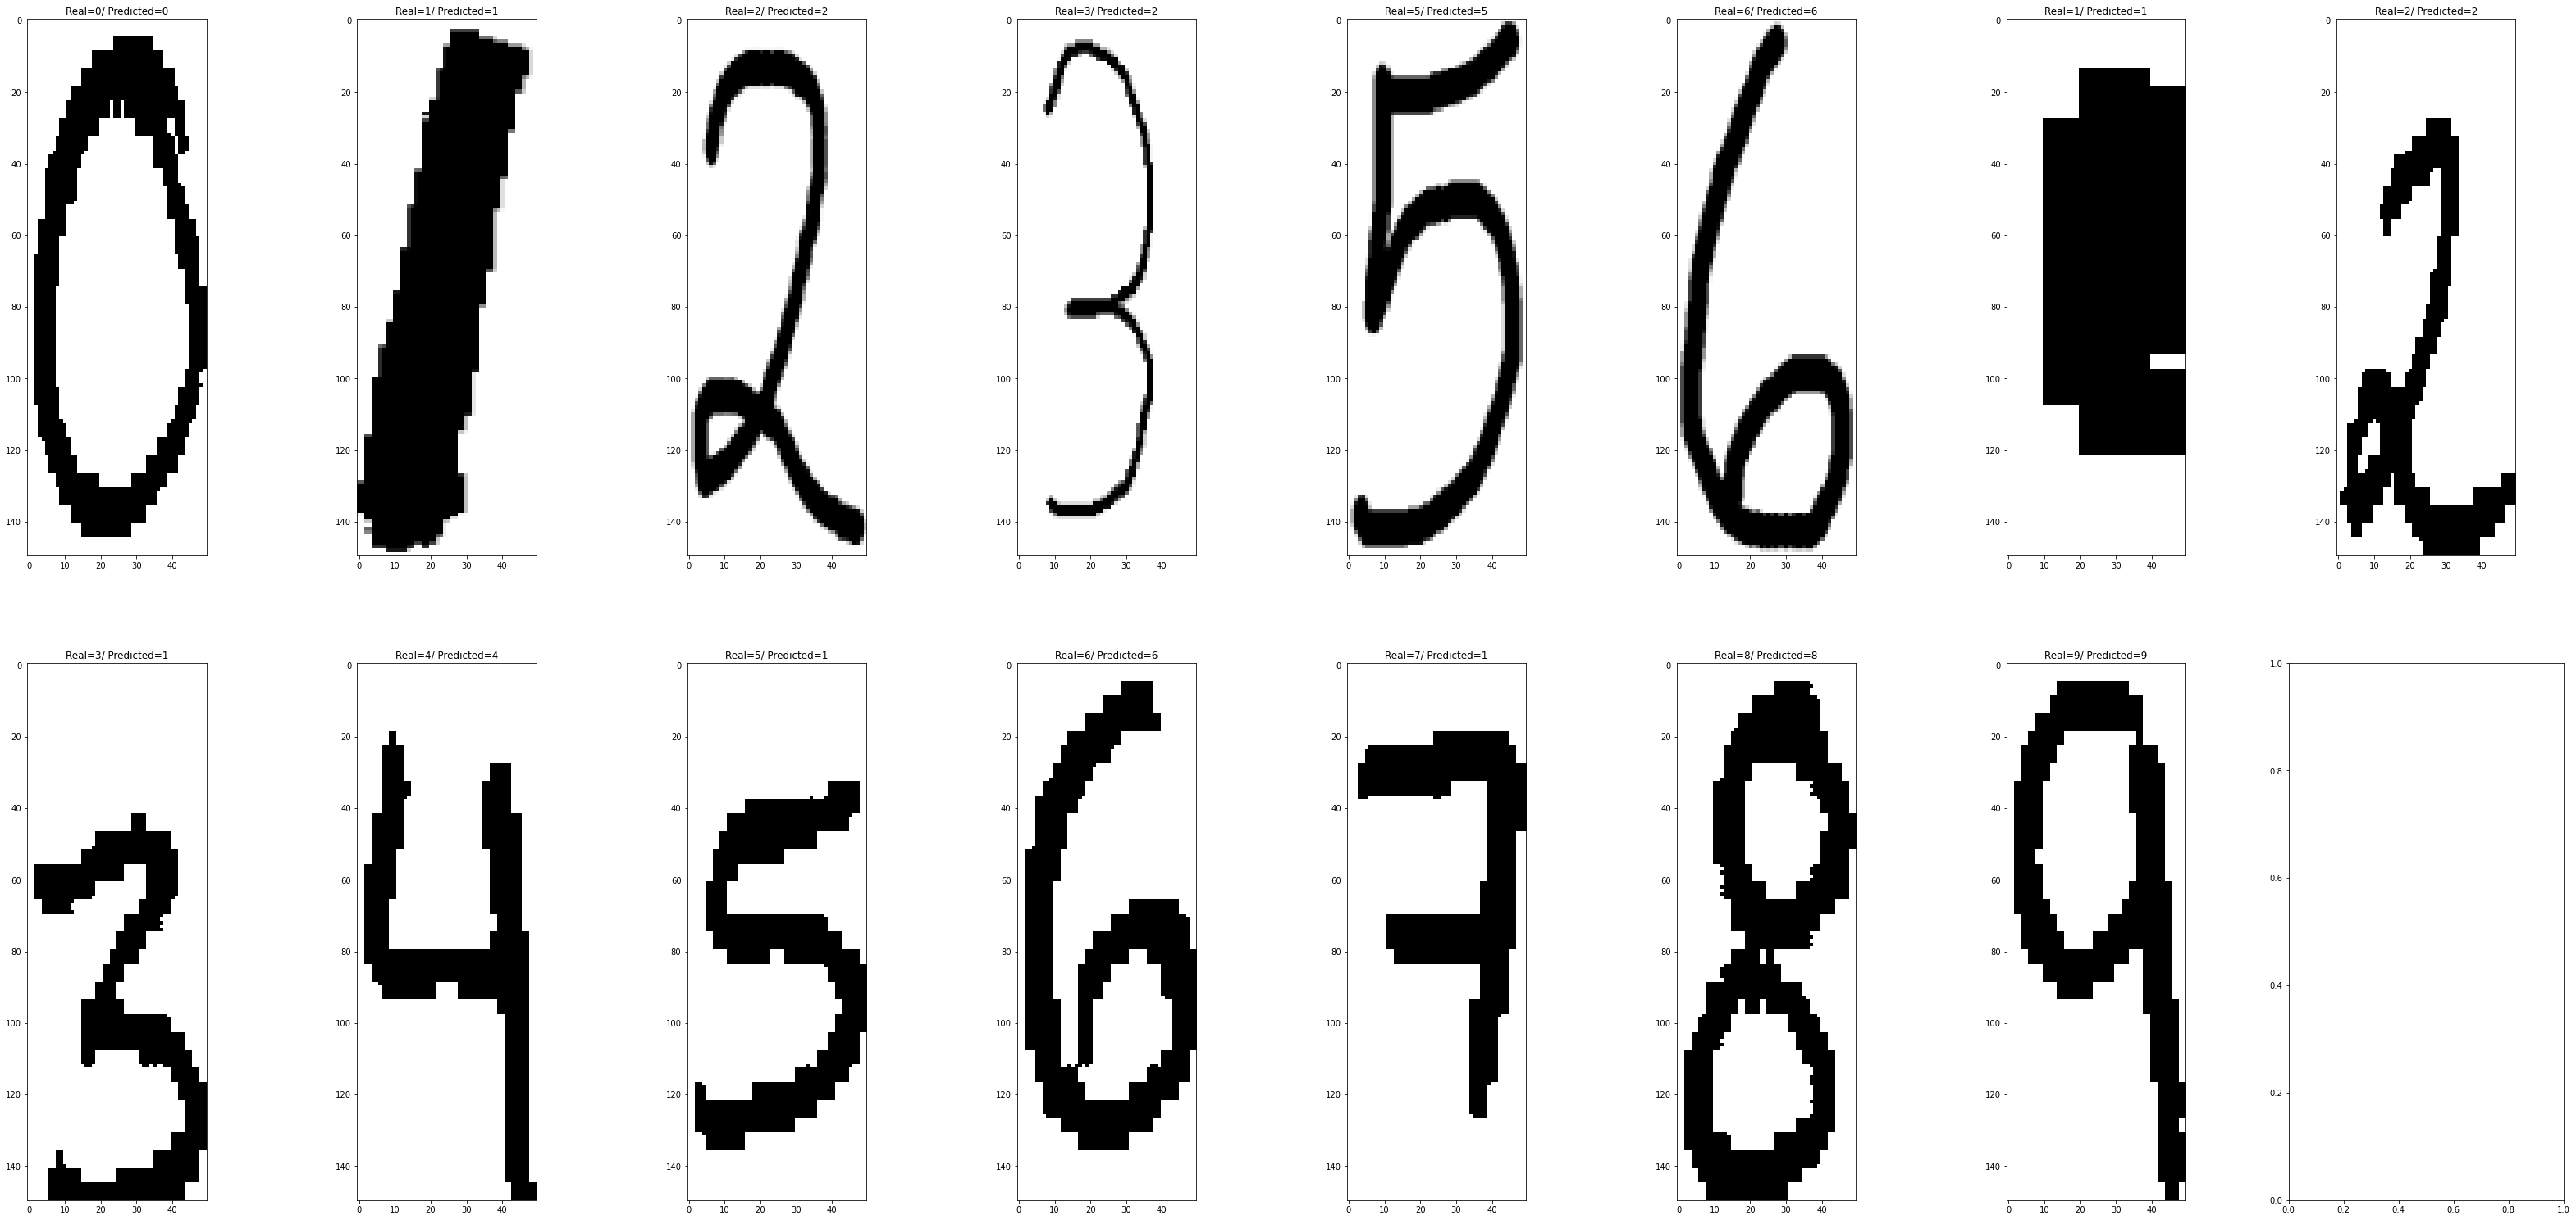

In [9]:
cantFilas = 2

cantColumnas = len(predictions)//cantFilas

if(len(predictions)%cantFilas != 0):

    cantColumnas += 1

print(str(cantFilas)+"x"+str(cantColumnas))

%matplotlib inline

fig, axs = plt.subplots(cantFilas,cantColumnas,figsize=(50,25))
fig.subplots_adjust(0.125,0.1,1,0.9,0.2,0.2)
fig.set_tight_layout(tight=False)

# Contadores para localizar el subplot
x = 0
y = 0

for dictionaryEntry in predictions:

    description = "Real="+dictionaryEntry.get("label")+"/ Predicted="+dictionaryEntry.get("prediction")

    pic = np.reshape(dictionaryEntry.get("image"), (150,50))
    axs[x,y].imshow(pic, cmap = "gray")
    axs[x,y].set_title(description)

    if (y < cantColumnas-1):
        y += 1
    else:
        x += 1
        y = 0 

fig.show()
fig.savefig("LogisticRegressionResults.jpeg")